# Discrete Fourier Transform

- The discrete fourier transform $\mathrm{DFT}$:

$$\mathrm{Y}[k] = \sum_{n=0}^{N-1} \mathrm{y}[n] \cdot e^{-2 \pi i k \frac{n}{N}} $$

$$k=0,1,2,\ldots,N-1$$

- The inverse discrete fourier transform $\mathrm{IDFT}$:

$$\mathrm{y}[n] = \frac{1}{N}\sum_{k=0}^{N-1} \mathrm{Y}[k] \cdot
e^{2 \pi i k \frac{n}{N}}$$

$$n=0,1,2,\ldots,N-1$$

-  Matrix form
  
```python
   # F = Fourier Matrix
   # y = Signal
   # Y = F @ y
   # y = np.conjugate(F)/N @  Y
   
```

In [36]:
# @title Import libraries and customize matplotlib styles params

import numpy as np
import matplotlib.pyplot as plt

# https://matplotlib.org/stable/tutorials/introductory/customizing.html

# set defaults
plt.rcParams.update(plt.rcParamsDefault)

SMALL_SIZE  = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

# fonts
plt.rc('font',  size=SMALL_SIZE)
# title
plt.rc('axes',titlesize=BIGGER_SIZE)
plt.rc('axes',titleweight='bold')
# xy-labells
plt.rc('axes',labelsize=SMALL_SIZE)
# xy-ticks
plt.rc('xtick',labelsize=SMALL_SIZE)
plt.rc('ytick',labelsize=SMALL_SIZE)
# legend
plt.rc('legend',fontsize =SMALL_SIZE)
plt.rc('legend',framealpha=1)
plt.rc('legend',loc='upper center')
# lines
plt.rc('lines',linewidth=1.5)
# grid
plt.rc('axes' ,grid=True)

# pixel in inches
px2inch = 1/plt.rcParams['figure.dpi']

def plot_sets(ax,ti='',xla='',yla='',ba=1,xli=False,yli=False,leg=False,leg_loc=1):

    ax.set_title(ti)
    ax.set_xlabel(xla)
    ax.set_ylabel(yla)
    ax.set_box_aspect(ba)

    if xli: ax.set_xlim(xli)
    if yli: ax.set_ylim(yli)
    if leg: ax.legend(loc=leg_loc)


In [37]:
# @title Comparison of DFT implementations

def get_signal(t,A_array=[1,2,2],f_array=[10,20,30]):

    y = np.zeros_like(t)
    for A,f in zip(A_array,f_array):
        y+= A*np.sin(2*np.pi*f*t)
    return y

def DFT0(y):
    return np.fft.fft(y)

def DFT1(y):

    N  = y.size
    Y  = np.zeros_like(y,dtype=complex)
    tn = np.arange(0,N)/N

    for k in range(N):
        Y[k] = np.sum( y*np.exp(-2*np.pi*1j*k*tn) )
    return Y

def DFT2(y):

    N  = y.size
    Y  = np.zeros_like(y,dtype=complex)
    tn = np.arange(0,N)/N

    for k in range(N):
        Y[k] = np.dot( y, np.exp(-2*np.pi*1j*k*tn) )
    return Y

def DFT3(y,return_matrix=False):

    # DFT: Matrix implementation
    #
    # Y = F @ y
    # y = np.conjugate(F)/N @  Y
    #
    # Fourier matrix F, N = 10
    #
    #        0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
    #     ----------------------- tn ----------------------->
    #  0  |  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
    #  1  |  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
    #  2  |  0.0  0.2  0.4  0.6  0.8  1.0  1.2  1.4  1.6  1.8
    #  3  |  0.0  0.3  0.6  0.9  1.2  1.5  1.8  2.1  2.4  2.7
    #  4  k  0.0  0.4  0.8  1.2  1.6  2.0  2.4  2.8  3.2  3.6
    #  5  |  0.0  0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5
    #  6  |  0.0  0.6  1.2  1.8  2.4  3.0  3.6  4.2  4.8  5.4
    #  7  |  0.0  0.7  1.4  2.1  2.8  3.5  4.2  4.9  5.6  6.3
    #  8  |  0.0  0.8  1.6  2.4  3.2  4.0  4.8  5.6  6.4  7.2
    #  9  v  0.0  0.9  1.8  2.7  3.6  4.5  5.4  6.3  7.2  8.1

    N  = y.size
    k  = np.arange(N).reshape(N,1)
    tn = k.T/N
    Fi = k @ tn
    F  = np.exp(-2*np.pi*1j*Fi)
    Y  = F @ y

    if return_matrix: return Y,F
    else:             return Y


def spectrum_frequencies(Y,fs):

    N         = Y.size
    Yall      = np.abs(Y)/N
    Ypos      = np.copy( Yall[:int(N/2)+1] )
    Ypos[1:] *= 2

    fall = np.arange(0,N)*fs/N
    fpos = np.linspace(0,fs/2,int(N/2)+1)

    return Yall,Ypos,fall,fpos

def noise(y,k):

    N   = y.size
    RMS = np.sqrt( np.sum( y**2)/N )

    return k*RMS*np.random.randn(*y.shape)


In [38]:
# @title Average values of implementations

t  = np.linspace(0,5,1000)
y  = get_signal(t,A_array=[1,2,3],f_array=[3,2,1])

for DFT in [DFT0,DFT1,DFT2,DFT3]:
    print(f'{DFT.__name__}: {np.mean(np.abs(DFT(y))):0.8f} ')

# %timeit DFT1(y)
# %timeit DFT2(y)
# %timeit DFT3(y)
# %timeit DFT4(y)


DFT0: 6.51817258 
DFT1: 6.51817258 
DFT2: 6.51817258 
DFT3: 6.51817258 


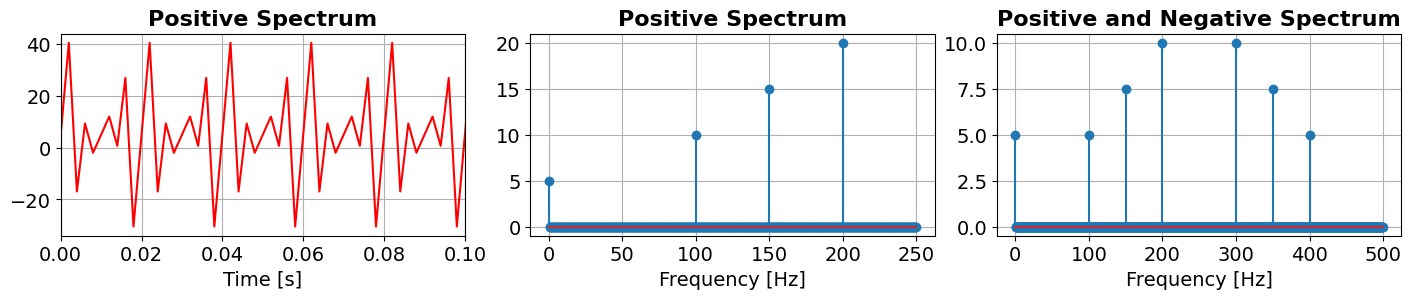

In [39]:
# @title Example 1

N  = 1000
Fs = 500
Ts = 1/Fs
t  = np.arange(0,N)*Ts

A_array = np.array( [10,  15,  20 ] )
f_array = np.array( [100, 150, 200] )
DC      = 5
y       = DC + get_signal(t,A_array,f_array)

Yall,Ypos,fall,fpos = spectrum_frequencies(DFT0(y),Fs)

%matplotlib inline
fig, ax = plt.subplots(1,3,constrained_layout=True,figsize=(1400*px2inch , 600*px2inch))

ax[0].plot(t,y,'r')
ax[1].stem(fpos,Ypos)
ax[2].stem(fall,Yall)

plot_sets(ax[0],ti='Positive Spectrum',xla='Time [s]',ba=0.5,xli=[0,10 * 1/np.min(f_array)])
plot_sets(ax[1],ti='Positive Spectrum',xla='Frequency [Hz]',ba=0.5)
plot_sets(ax[2],ti='Positive and Negative Spectrum',xla='Frequency [Hz]',ba=0.5)

In [40]:
# @title Example 2

N  = 1000
Fs = 20
Ts = 1/Fs
t  = np.arange(0,N)*Ts

A_array = np.array( [30, 20, 10] )
f_array = np.array( [2, 4, 6] )
DC      = 5
y       = DC + get_signal(t,A_array,f_array)

Yall,Ypos,fall,fpos = spectrum_frequencies(DFT0(y),Fs)


# DFT as winding machine
##########################
Fmax     = int(np.max(f_array) + 1)
Fwinding = np.arange(-Fmax,Fmax,0.01)
xc       = np.zeros_like(Fwinding)
yc       = np.zeros_like(Fwinding)
xyc      = np.zeros_like(Fwinding)

for i,f in enumerate(Fwinding):
    xy     =  y * np.exp(-2*np.pi*1j*f*t)
    xc[i]  = np.mean( np.real(xy) )
    yc[i]  = np.mean( np.imag(xy) )
    xyc[i] = np.abs(  np.mean(xy) )


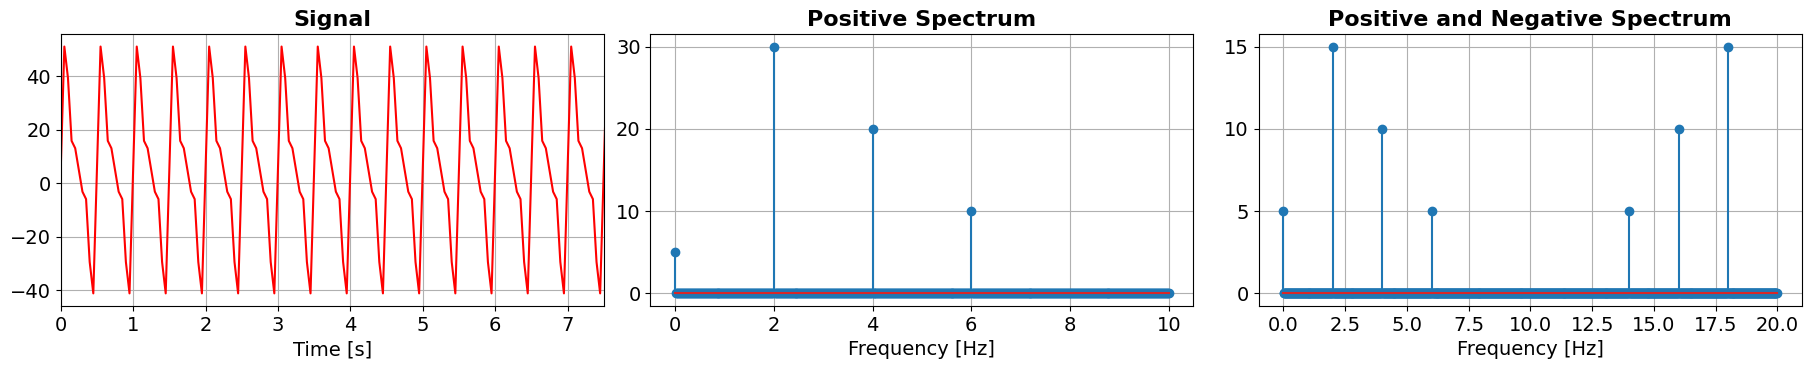

In [41]:
%matplotlib inline
fig, ax = plt.subplots(1,3,constrained_layout=True,figsize=(1800*px2inch , 600*px2inch))

ax[0].plot(t,y,'r')
ax[1].stem(fpos,Ypos)
ax[2].stem(fall,Yall)

plot_sets(ax[0],ti='Signal',xla='Time [s]',ba=0.5,xli=[0,15 * 1/np.min(f_array)])
plot_sets(ax[1],ti='Positive Spectrum',xla='Frequency [Hz]',ba=0.5)
plot_sets(ax[2],ti='Positive and Negative Spectrum',xla='Frequency [Hz]',ba=0.5);


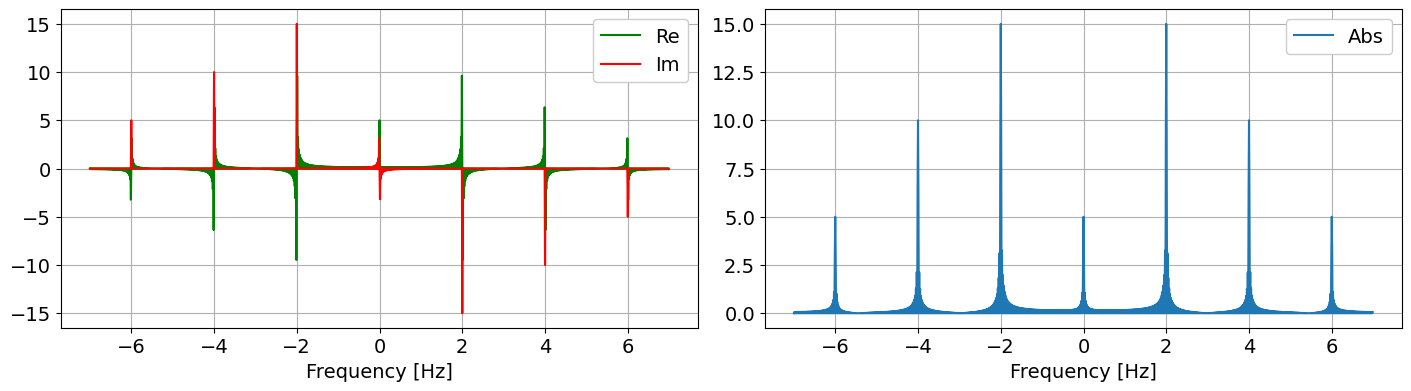

In [42]:
%matplotlib inline
fig, ax = plt.subplots(1,2,constrained_layout=True,figsize=(1400*px2inch , 700*px2inch))

ax[0].plot(Fwinding,xc, 'g',label='Re')
ax[0].plot(Fwinding,yc, 'r',label='Im')
ax[1].plot(Fwinding,xyc,label='Abs')

plot_sets(ax[0],xla='Frequency [Hz]',ba=0.5,leg=True)
plot_sets(ax[1],xla='Frequency [Hz]',ba=0.5,leg=True);


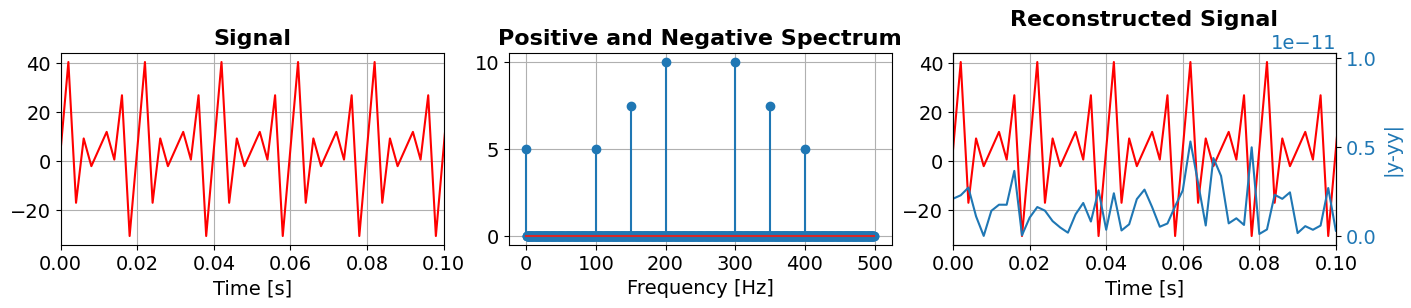

In [43]:
# @title Reconstructed Signal

N  = 1000
Fs = 500
Ts = 1/Fs
t  = np.arange(0,N)*Ts

# Signal y
A_array = np.array( [10,  15,  20 ] )
f_array = np.array( [100, 150, 200] )
DC      = 5
y       = DC + get_signal(t,A_array,f_array)

Yall,Ypos,fall,fpos = spectrum_frequencies(DFT0(y),Fs)

# Reconstructed Signal yy
YY,F = DFT3(y,return_matrix=True)
yy = np.conjugate(F)/N @  YY

%matplotlib inline
fig, ax = plt.subplots(1,3,constrained_layout=True,figsize=(1400*px2inch , 700*px2inch))

ax[0].plot(t,y,'r')
ax[1].stem(fall,Yall)
ax[2].plot(t,np.real(yy),'r')
axL = ax[2].twinx()
axL.plot(t,np.abs(y-np.real(yy)))
axL.tick_params(axis='y', labelcolor='tab:blue')
axL.set_ylabel('|y-yy|',color='tab:blue')
axL.grid(False)

plot_sets(ax[0],ti='Signal',xla='Time [s]',ba=0.5,xli=[0,10 * 1/np.min(f_array)])
plot_sets(ax[1],ti='Positive and Negative Spectrum',xla='Frequency [Hz]',ba=0.5)
plot_sets(ax[2],ti='Reconstructed Signal',xla='Time [s]',ba=0.5,xli=[0,10 * 1/np.min(f_array)])